In [1]:
import pandas as pd

# Load the dataset
file_path = r"F:\Lung Cancer Dataset.csv"  # Use 'r' to handle Windows paths
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [2]:
# Check basic info about the dataset
df.info()

# Check for missing values
print(df.isnull().sum())

# Check unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [3]:
# Convert target column to binary (0 = NO, 1 = YES)
df["PULMONARY_DISEASE"] = df["PULMONARY_DISEASE"].map({"NO": 0, "YES": 1})

# Verify changes
print(df["PULMONARY_DISEASE"].unique())  # Output: [0, 1]

# Check dataset after modification
df.head()


[0 1]


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


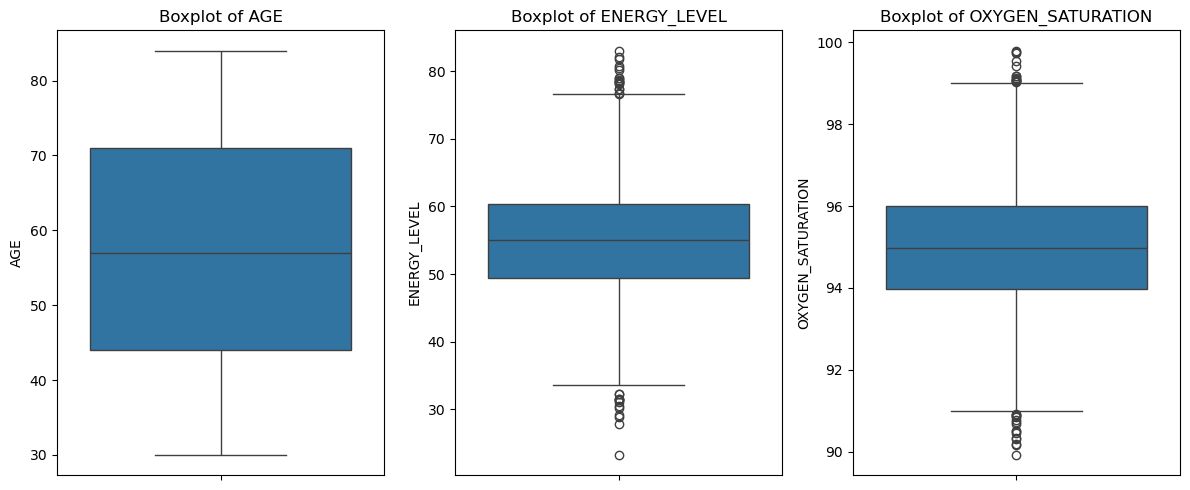

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = ["AGE", "ENERGY_LEVEL", "OXYGEN_SATURATION"]

# Plot boxplots for each numerical feature
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [5]:
# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # First quartile (25%)
    Q3 = df[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers.shape[0]  # Return count of outliers

# Check for outliers in numerical columns
for col in numerical_cols:
    outliers_count = detect_outliers(df, col)
    print(f"{col} has {outliers_count} outliers.")


AGE has 0 outliers.
ENERGY_LEVEL has 31 outliers.
OXYGEN_SATURATION has 30 outliers.


In [6]:
# Function to remove outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where the column has outliers
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df_cleaned

# Remove outliers from ENERGY_LEVEL and OXYGEN_SATURATION
df = remove_outliers(df, "ENERGY_LEVEL")
df = remove_outliers(df, "OXYGEN_SATURATION")

# Check new dataset shape
print("New dataset shape after outlier removal:", df.shape)


New dataset shape after outlier removal: (4939, 18)


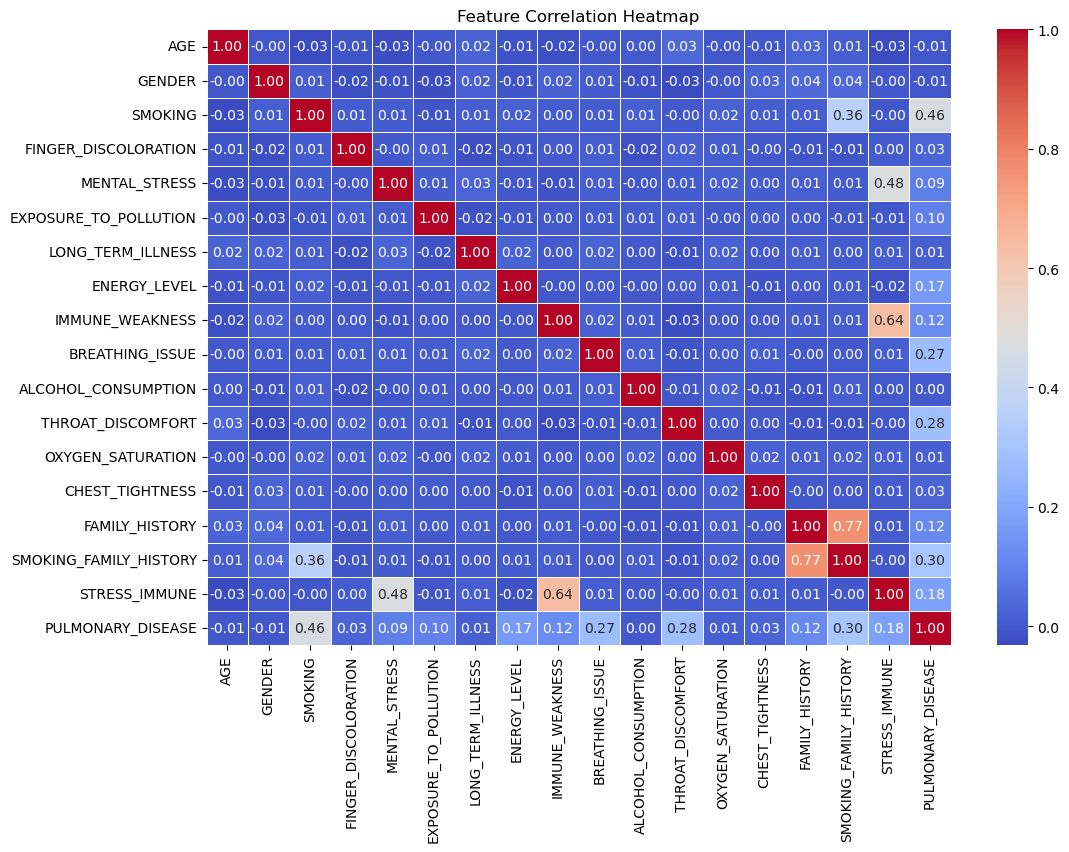

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
# Compute correlation of features with target variable
correlation_with_target = df.corr()["PULMONARY_DISEASE"].sort_values(ascending=False)

# Display correlation values
print("Correlation of each feature with PULMONARY_DISEASE:\n")
print(correlation_with_target)


Correlation of each feature with PULMONARY_DISEASE:

PULMONARY_DISEASE         1.000000
SMOKING                   0.461280
SMOKING_FAMILY_HISTORY    0.303980
THROAT_DISCOMFORT         0.281791
BREATHING_ISSUE           0.271306
STRESS_IMMUNE             0.180016
ENERGY_LEVEL              0.165104
IMMUNE_WEAKNESS           0.123783
FAMILY_HISTORY            0.117585
EXPOSURE_TO_POLLUTION     0.096418
MENTAL_STRESS             0.089744
CHEST_TIGHTNESS           0.026404
FINGER_DISCOLORATION      0.026371
LONG_TERM_ILLNESS         0.013647
OXYGEN_SATURATION         0.012275
ALCOHOL_CONSUMPTION       0.000799
GENDER                   -0.006274
AGE                      -0.007476
Name: PULMONARY_DISEASE, dtype: float64


In [9]:
# Drop GENDER and AGE from the dataset
df = df.drop(columns=["GENDER", "AGE"])

# Check new dataset shape
print("New dataset shape:", df.shape)


New dataset shape: (4939, 16)


In [10]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop("PULMONARY_DISEASE", axis=1)  # Features
y = df["PULMONARY_DISEASE"]  # Target variable (0 = No, 1 = Yes)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset sizes
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (3951, 15) (3951,)
Testing set: (988, 15) (988,)


In [11]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Train LightGBM model
lgbm_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Model Accuracy after removing GENDER & AGE: {accuracy_lgbm:.4f}")


[LightGBM] [Info] Number of positive: 1606, number of negative: 2345
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 536
[LightGBM] [Info] Number of data points in the train set: 3951, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406479 -> initscore=-0.378539
[LightGBM] [Info] Start training from score -0.378539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [12]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy after removing GENDER & AGE: {accuracy_xgb:.4f}")


XGBoost Model Accuracy after removing GENDER & AGE: 0.9089


In [37]:
import joblib
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric="logloss")

# Perform Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train XGBoost with best parameters
best_xgb = xgb.XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb_best = best_xgb.predict(X_test)

# Evaluate accuracy
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
print(f"Tuned XGBoost Model Accuracy: {accuracy_xgb_best:.4f}")

# Save the trained model using joblib
model_path = "F:\\lung_cancer_app\\predictor\\models\\tuned_xgb_model.pkl"
joblib.dump(best_xgb, model_path)
print(f"✅ Model saved successfully at {model_path}")


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Tuned XGBoost Model Accuracy: 0.9130
✅ Model saved successfully at F:\lung_cancer_app\predictor\models\tuned_xgb_model.pkl


In [27]:
df.head()

,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1
